In [164]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
original_data = pd.read_pickle("preparedData.pkl")
data = original_data.copy()

In [166]:
print(data['connectionTime'].max())
print(data['connectionTime'].min())

2021-09-14 05:43:39+00:00
2018-04-25 13:45:10+00:00


In [167]:
data = data[(data['disconnectTime'] < "2020-04-01") ^ (data['disconnectTime'] >= "2021-01-01")].copy()
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [168]:
print(data['connectionTime'].max())
print(data['connectionTime'].min())

2021-09-14 05:43:39+00:00
2018-04-25 13:45:10+00:00


In [169]:
data = data[data["siteID"] == 1].copy()

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26717 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          26717 non-null  datetime64[ns, UTC]
 1   disconnectTime          26717 non-null  datetime64[ns, UTC]
 2   doneChargingTime        26717 non-null  datetime64[ns, UTC]
 3   kWhDelivered            26717 non-null  float64            
 4   siteID                  26717 non-null  int64              
 5   userID                  25442 non-null  float64            
 6   combinedSpaceStationID  26717 non-null  object             
 7   timeConnected           26717 non-null  float64            
 8   idleTime                26717 non-null  float64            
 9   chargingTime            26717 non-null  float64            
 10  weekday                 26717 non-null  int32              
 11  month                   26717 non-null  int32 

In [171]:
data.dropna(inplace=True)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25442 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          25442 non-null  datetime64[ns, UTC]
 1   disconnectTime          25442 non-null  datetime64[ns, UTC]
 2   doneChargingTime        25442 non-null  datetime64[ns, UTC]
 3   kWhDelivered            25442 non-null  float64            
 4   siteID                  25442 non-null  int64              
 5   userID                  25442 non-null  float64            
 6   combinedSpaceStationID  25442 non-null  object             
 7   timeConnected           25442 non-null  float64            
 8   idleTime                25442 non-null  float64            
 9   chargingTime            25442 non-null  float64            
 10  weekday                 25442 non-null  int32              
 11  month                   25442 non-null  int32 

In [173]:
data['connectionTime'] = data['connectionTime'].dt.tz_convert(tz='Etc/GMT-8')
data['disconnectTime'] = data['disconnectTime'].dt.tz_convert(tz='Etc/GMT-8')
data['doneChargingTime'] = data['doneChargingTime'].dt.tz_convert(tz='Etc/GMT-8')
data["ConnectionHour"] = data['connectionTime'].dt.hour
data["weekday"] = data["connectionTime"].dt.day_of_week

In [174]:
# Berechne die gesamte zur Verfügung stehende Zeit in der Woche in Minuten
total_time_in_week = 7 * 24 * 60  # 7 Tage * 24 Stunden * 60 Minuten
data["progressInWeek"] = (data["weekday"] * 24 * 60 + data["ConnectionHour"] * 60 + data['connectionTime'].dt.minute) / total_time_in_week

In [175]:
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,ConnectionHour,progressInWeek
0,2020-01-02 21:08:54+08:00,2020-01-03 03:11:15+08:00,2020-01-03 01:31:35+08:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,...,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",21,0.554365
1,2020-01-02 21:36:50+08:00,2020-01-03 06:38:21+08:00,2020-01-03 04:18:05+08:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,...,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",21,0.557143
2,2020-01-02 21:56:35+08:00,2020-01-03 08:39:22+08:00,2020-01-03 00:35:06+08:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,...,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",21,0.559127
3,2020-01-02 21:59:58+08:00,2020-01-03 00:38:39+08:00,2020-01-02 23:18:45+08:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,...,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",21,0.559425
4,2020-01-02 22:00:01+08:00,2020-01-03 06:08:40+08:00,2020-01-03 02:17:30+08:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,...,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",22,0.559524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-02 03:13:11+08:00,2019-07-02 08:44:40+08:00,2019-07-02 05:13:56+08:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,...,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT",3,0.162004
56532,2019-07-02 03:43:46+08:00,2019-07-02 10:58:53+08:00,2019-07-02 10:43:53+08:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,...,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT",3,0.164980
56533,2019-07-02 04:34:30+08:00,2019-07-02 08:30:52+08:00,2019-07-02 05:27:44+08:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,...,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT",4,0.170040
56534,2019-07-02 05:49:12+08:00,2019-07-02 09:37:18+08:00,2019-07-02 07:14:33+08:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,...,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",5,0.177480


In [176]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
count,25442.000000,25442.0,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000,25442.000000
mean,14.404142,1.0,1737.405000,26393.643581,11659.451065,14734.192516,2.255758,5.971661,363.754658,25.912640,76.075191,389.761379,15.894309,0.419791
std,10.828561,0.0,2570.499269,12219.165453,10776.115574,9078.200643,1.518783,3.574597,92.998594,20.812767,62.467046,185.495859,8.605087,0.204632
min,0.503000,1.0,76.000000,183.000000,1.000000,61.000000,0.000000,1.000000,50.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,6.866000,1.0,409.000000,16670.000000,1959.000000,8209.250000,1.000000,3.000000,290.000000,12.000000,30.000000,240.000000,6.000000,0.273115
50%,11.549000,1.0,607.000000,29979.000000,10117.500000,12977.500000,2.000000,6.000000,360.000000,20.000000,50.000000,422.000000,21.000000,0.419544
75%,17.250750,1.0,1989.000000,34934.000000,19425.000000,19183.250000,3.000000,9.000000,400.000000,32.600000,100.000000,534.000000,22.000000,0.567758
max,66.971000,1.0,19923.000000,291877.000000,276544.000000,276655.000000,6.000000,12.000000,630.000000,180.000000,480.000000,1621.000000,23.000000,0.999603


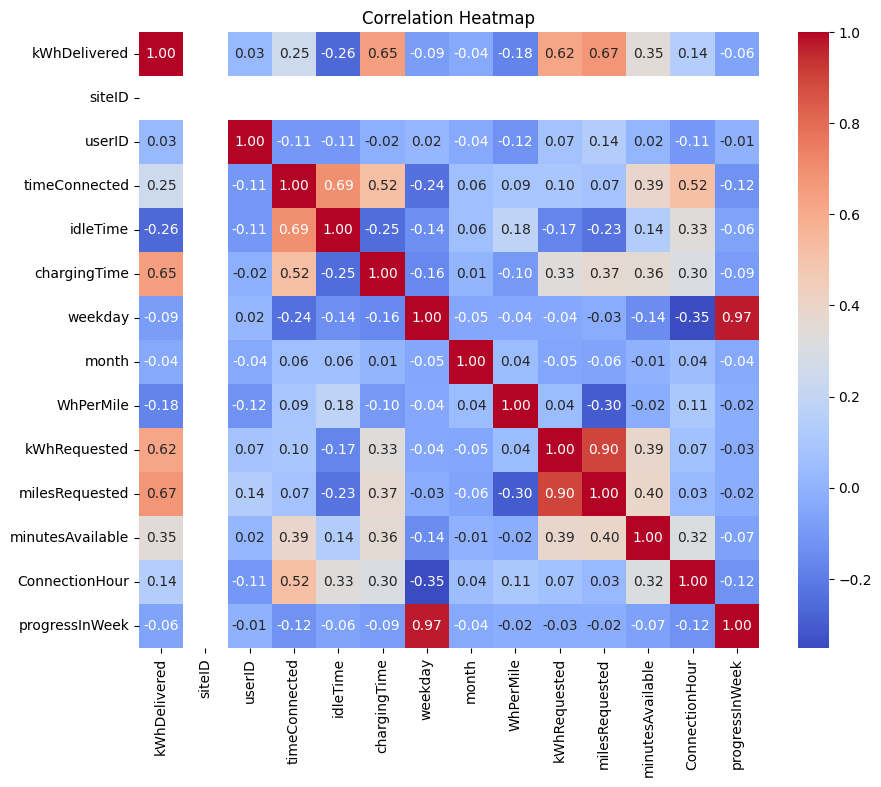

In [177]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [178]:
correlation_matrix

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable,ConnectionHour,progressInWeek
kWhDelivered,1.000000,NaN,0.031900,0.246326,-0.264974,0.646085,-0.087100,-0.035882,-0.175120,0.620796,0.674017,0.345344,0.139896,-0.057529
siteID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userID,0.031900,NaN,1.000000,-0.105432,-0.105778,-0.016349,0.019778,-0.035571,-0.122675,0.071104,0.136719,0.015568,-0.105624,-0.005566
timeConnected,0.246326,NaN,-0.105432,1.000000,0.694964,0.521045,-0.239393,0.059297,0.087645,0.096038,0.071331,0.389735,0.516607,-0.124468
idleTime,-0.264974,NaN,-0.105778,0.694964,1.000000,-0.251618,-0.138327,0.059353,0.183100,-0.168925,-0.228145,0.139013,0.330519,-0.063740
chargingTime,0.646085,NaN,-0.016349,0.521045,-0.251618,1.000000,-0.158022,0.009359,-0.099376,0.329785,0.366826,0.359566,0.303011,-0.091872
weekday,-0.087100,NaN,0.019778,-0.239393,-0.138327,-0.158022,1.000000,-0.048368,-0.043482,-0.042984,-0.025562,-0.141620,-0.352018,0.972070
month,-0.035882,NaN,-0.035571,0.059297,0.059353,0.009359,-0.048368,1.000000,0.041559,-0.053838,-0.060432,-0.008277,0.044242,-0.040311
WhPerMile,-0.175120,NaN,-0.122675,0.087645,0.183100,-0.099376,-0.043482,0.041559,1.000000,0.041981,-0.302983,-0.020818,0.106164,-0.019369
kWhRequested,0.620796,NaN,0.071104,0.096038,-0.168925,0.329785,-0.042984,-0.053838,0.041981,1.000000,0.895461,0.386012,0.067296,-0.028920


In [179]:
columns_to_drop = ['siteID', 'userID', 'chargingTime', 'month', 
                   'milesRequested', 'minutesAvailable', 
                   'ConnectionHour', 'weekday', 'timeConnected', 'WhPerMile', 'kWhRequested', 'idleTime']

numeric_data.drop(columns=columns_to_drop, inplace=True)

In [180]:
numeric_data

,kWhDelivered,progressInWeek
0,25.016,0.554365
1,33.097,0.557143
2,6.521,0.559127
3,2.355,0.559425
4,13.375,0.559524
...,...,...
56531,6.048,0.162004
56532,41.047,0.164980
56533,5.390,0.170040
56534,8.399,0.177480


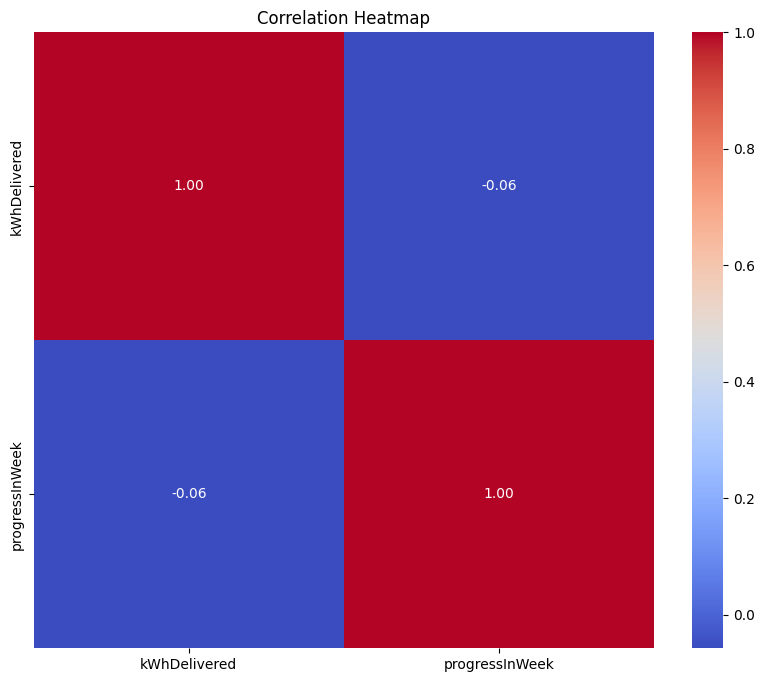

In [181]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data_scaled = scaler.transform(numeric_data)
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns, index=numeric_data.index)
numeric_data_scaled_df.describe()

,kWhDelivered,progressInWeek
count,2.544200e+04,2.544200e+04
mean,-3.630633e-18,-7.819824e-18
std,1.000020e+00,1.000020e+00
min,-1.283773e+00,-2.051487e+00
25%,-6.961488e-01,-7.167958e-01
50%,-2.636729e-01,-1.211214e-03
75%,2.628848e-01,7.231000e-01
max,4.854559e+00,2.833493e+00


In [183]:
from sklearn.cluster import KMeans

In [184]:
k_max = 25  # We have a lot of datapoints, however more than 25 clusters are definitely
            # not reasonable!

In [185]:
#These lines initialize two empty lists to store the number of clusters (clusters) and the
#corresponding inertia (sum of squared distances to the nearest cluster center) for each k value (losses)
clusters = []
losses = []

#This is a loop that iterates over different values of k
for k in range(k_max):
    #For each k, a new instance of the KMeans clustering algorithm is created. The n_clusters parameter is set to k+1 to specify the number of clusters, and n_init='auto' indicates
    #that the algorithm should automatically choose the number of initializations for the centroids
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(numeric_data_scaled)
    clusters.append(k+1)

    #The inertia of the fitted model is calculated using the inertia_ attribute, representing the sum of squared distances to the nearest cluster center.
    #This value is then appended to the losses list
    losses.append(model.inertia_)

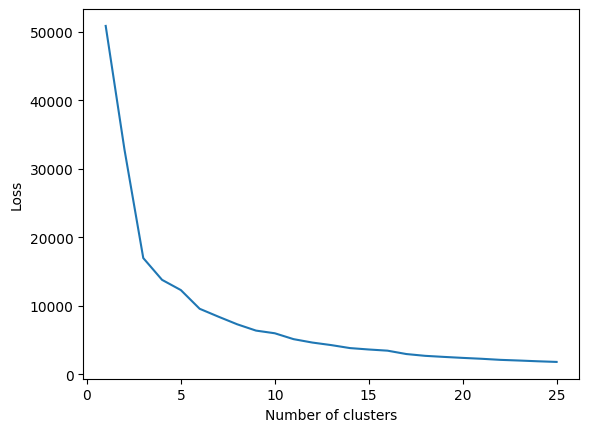

In [186]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 15.0)

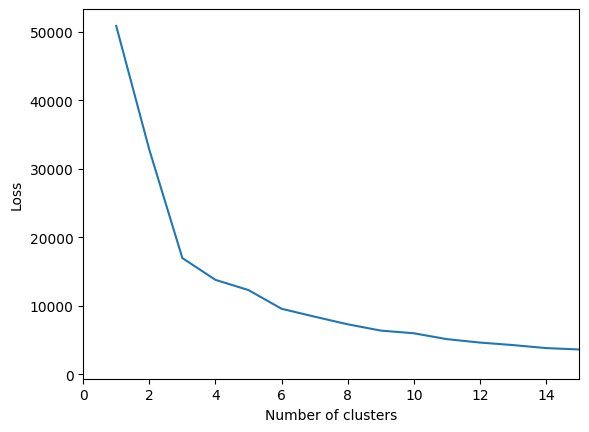

In [187]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,15])

(0.0, 6.0)

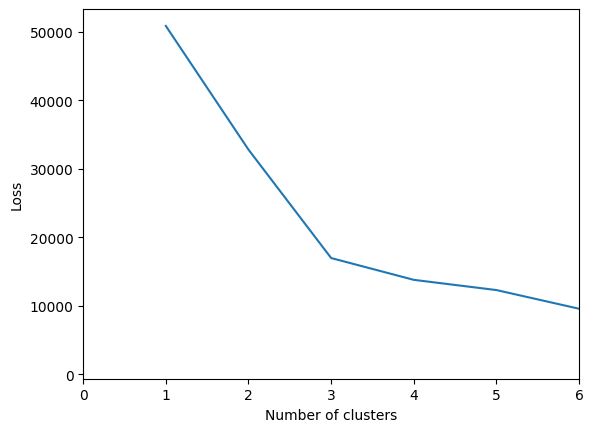

In [188]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

(0.0, 6.0)

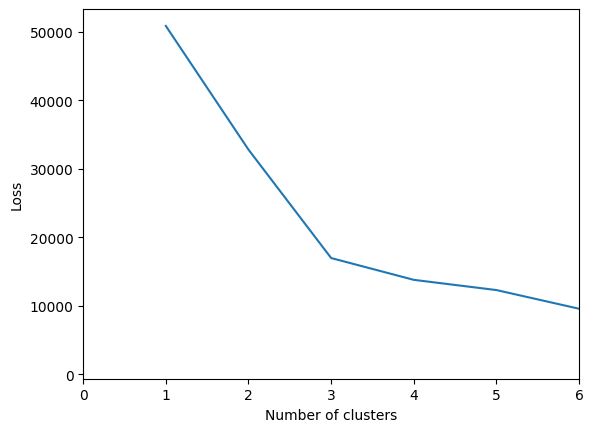

In [189]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [190]:
two_means = KMeans(n_clusters=2, n_init='auto')
two_means.fit(numeric_data_scaled)

KMeans(n_clusters=2, n_init='auto')

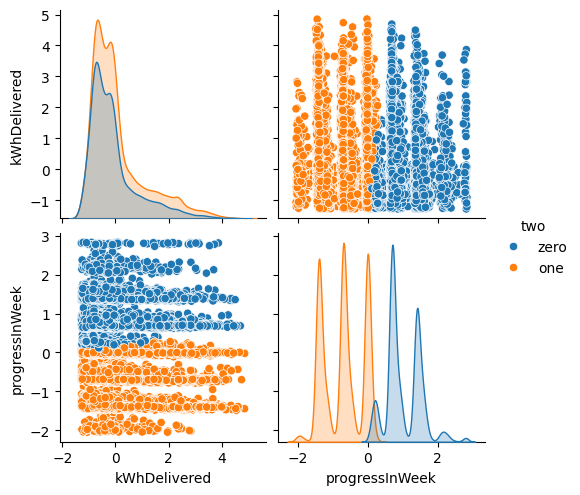

In [191]:
numbers = ["zero", "one", "two", "three", "four", "five"]

sessions_scaled = numeric_data_scaled_df.copy()
sessions_scaled["two"] = two_means.predict(numeric_data_scaled)
sessions_scaled["two"] = sessions_scaled["two"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="two")

In [192]:
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(numeric_data_scaled)

KMeans(n_clusters=3, n_init='auto')

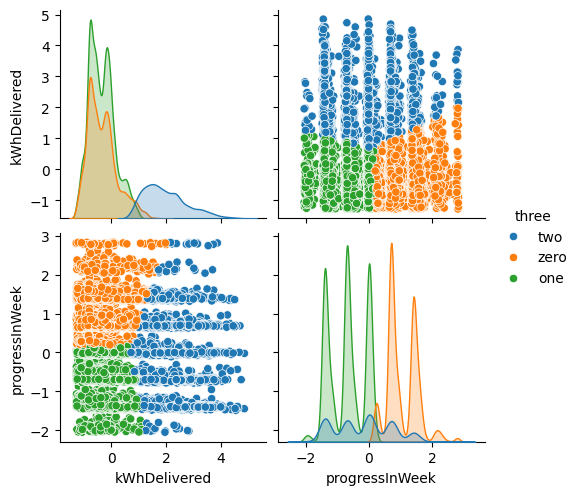

In [193]:
sessions_scaled["three"] = three_means.predict(numeric_data_scaled)
sessions_scaled["three"] = sessions_scaled["three"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="three")

In [194]:
four_means = KMeans(n_clusters=4, n_init='auto')
four_means.fit(numeric_data_scaled)

KMeans(n_clusters=4, n_init='auto')

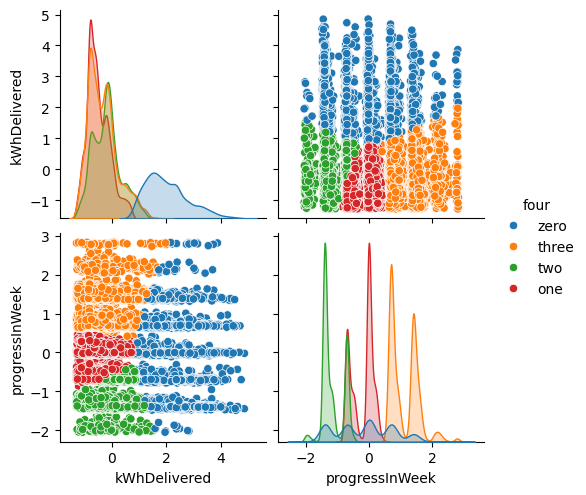

In [195]:
sessions_scaled["four"] = four_means.predict(numeric_data_scaled)
sessions_scaled["four"] = sessions_scaled["four"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="four")

In [196]:
five_means = KMeans(n_clusters=5, n_init='auto')
five_means.fit(numeric_data_scaled)

KMeans(n_clusters=5, n_init='auto')

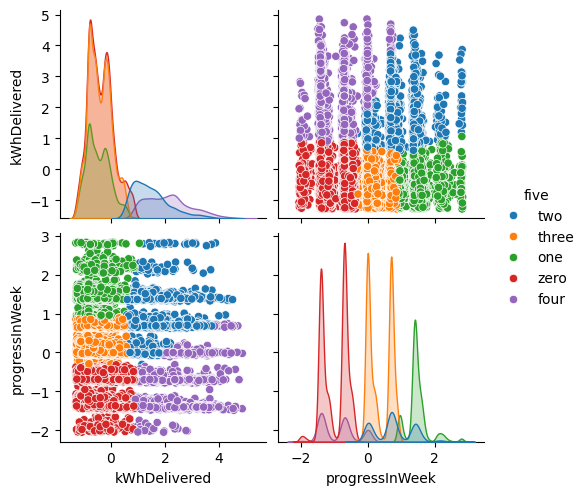

In [197]:
sessions_scaled["five"] = five_means.predict(numeric_data_scaled)
sessions_scaled["five"] = sessions_scaled["five"].apply(lambda x: numbers[x])
sns.pairplot(data=sessions_scaled, hue="five")

In [198]:
cluster_sizes = sessions_scaled["two"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
two
one     14891
zero    10551
Name: count, dtype: int64


In [199]:
average_efficiency_by_cluster = sessions_scaled.groupby('two')['kWhDelivered'].mean()
average_efficiency_by_cluster

two
one     0.068522
zero   -0.096707
Name: kWhDelivered, dtype: float64

In [200]:
cluster_sizes = sessions_scaled["three"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
three
one     12501
zero     9043
two      3898
Name: count, dtype: int64


In [201]:
average_efficiency_by_cluster = sessions_scaled.groupby('three')['kWhDelivered'].mean()
average_efficiency_by_cluster

three
one    -0.362062
two     1.965720
zero   -0.346814
Name: kWhDelivered, dtype: float64

In [202]:
cluster_sizes = sessions_scaled["four"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
four
three    8298
one      7198
two      6235
zero     3711
Name: count, dtype: int64


In [203]:
average_efficiency_by_cluster = sessions_scaled.groupby('four')['kWhDelivered'].mean()
average_efficiency_by_cluster

four
one     -0.494359
three   -0.331983
two     -0.186154
zero     2.013973
Name: kWhDelivered, dtype: float64

In [204]:
cluster_sizes = sessions_scaled["five"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)


Number of Datapoints in Each Cluster:
five
zero     8828
three    8019
one      3967
two      2477
four     2151
Name: count, dtype: int64


In [205]:
average_efficiency_by_cluster = sessions_scaled.groupby('five')['kWhDelivered'].mean()
average_efficiency_by_cluster

five
four     2.136721
one     -0.467247
three   -0.403274
two      1.499535
zero    -0.365090
Name: kWhDelivered, dtype: float64

    "Quick Chargers": Sessions with short durations and high charging rates.
    
    "Extended Sessions": Sessions that last longer and involve slower charging rates.
    
    "Off-Peak Chargers": Sessions that primarily occur during non-peak hours.
    
    "Weekend Chargers": Sessions that are more common on weekends.
    
    "Rapid Chargers": Sessions characterized by a high charging rate, regardless of duration.

    "Night Owls": Charging sessions that predominantly occur during nighttime hours.

    "Daytime Chargers": Sessions concentrated during daylight hours.

    "Intermittent Chargers": Sessions with frequent start-stop patterns, suggesting sporadic usage.

    "High Utilizers": Users or sessions with consistently high charging demand.

    "Low Utilizers": Users or sessions with consistently low charging demand.

    "Morning Commuters": Sessions that commonly occur during morning rush hours.

    "Afternoon Surges": Clusters with increased charging demand in the afternoon.

    "Weekday Warriors": High-demand sessions on weekdays, potentially indicating work-related charging.

    "Holiday Chargers": Sessions with distinct patterns during public holidays.

    "Energy Savers": Sessions that exhibit efforts to charge during lower energy cost periods.

    "Regular Routines": Sessions with predictable and consistent patterns.

    "Irregular Patterns": Clusters with unpredictable charging behavior.

    "Peak Load Chargers": Sessions contributing to high energy demand during peak load times.

    "Efficiency Seekers": Users optimizing for faster charging or energy efficiency.